<a href="https://colab.research.google.com/github/harnalashok/Clustering/blob/master/gmm_begin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gaussian Mixture Modeling
Refer [here](https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm.html#sphx-glr-auto-examples-mixture-plot-gmm-py)

### Call libraries

In [122]:
# 1.0.1 This line should be in the very first cell
#        There is now no need to call the show()
#       https://stackoverflow.com/a/51659116/3282777
%matplotlib inline

In [110]:
# 1.0.2
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import mixture

In [75]:
# 1.0.3
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Gaussian Mixture

Note that the Expectation Maximisation model will necessarily use all five components while the Variational Inference model will effectively only use as many as are needed for a good fit. Here we can see that the Expectation Maximisation model splits some components arbitrarily, because it is trying to fit too many components, while the Dirichlet Process model adapts it number of
state automatically.

This example doesn't show it, as we're in a low-dimensional space, but
another advantage of the Dirichlet process model is that it can fit
full covariance matrices effectively even when there are less examples
per cluster than there are dimensions in the data, due to
regularization properties of the inference algorithm.


### Some Experiments

In [59]:
# 2.0 Number of samples per component
n_samples = 500

In [77]:
# 2.1 What is a dot product?
a = np.array([[1, 0], [0, 1]])
a
print("\n-----\n")
b = np.array([[4, 1], [2, 2]])
b

array([[1, 0],
       [0, 1]])


-----



array([[4, 1],
       [2, 2]])

In [78]:
# 2.1 Perform dot product:
np.dot(a,b)

array([[4, 1],
       [2, 2]])

In [ ]:
# 2.2 Get 2D normal distribution
#     A random standard normal distribution:

r = np.random.randn(n_samples, 2)
r.shape    # (500,2)
r[:5,:]

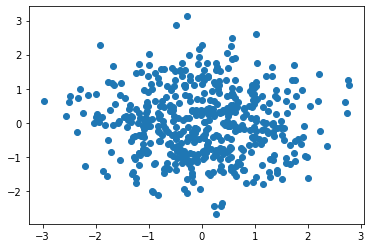

In [98]:
# 2.3 Scatter plot of this distribution
#      It is almost circular

plt.scatter(r[:,0],r[:,1]) ;

In [102]:
# 2.4 To make the above flat. we will multiply it with
#      following array of coeffecients. X will be allowed 
#       to vary a large range but not y:

C = np.array(
             [
                [0.0, -0.1], 
                [1.7,  0.4]
              ]
             )
C

array([[ 0. , -0.1],
       [ 1.7,  0.4]])

In [99]:
# 2.5 Large variation over t[:,0]     # Multiplier  0.0 * x1 + 1.7 * x2
#      Small variation over t[:,1]     # Multiplier -0.1*y1+ 0.4 * y2

t = np.dot(r, C)    # Each one of the two vertical coeffecients
                    #   decide x and y
t[:5,:]    

array([[ 0.61279853,  0.10462451],
       [ 0.36436098,  0.16466142],
       [-1.74023451, -0.36207531],
       [-1.69512906, -0.42115569],
       [-2.01640725, -0.43772167]])

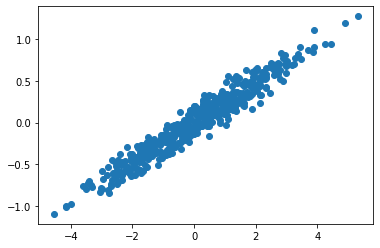

In [111]:
# 2.6
plt.scatter(t[:,0], t[:,1]) ;

In [108]:
# 2.7 Usage of:  np.r_

a = np.array([[0, 1, 2], [3, 4, 5]])
np.r_[a, a]         # Concatenate along first axis. Note the square brackets
print("\n------\n")
np.vstack([a,a])

array([[0, 1, 2],
       [3, 4, 5],
       [0, 1, 2],
       [3, 4, 5]])


------



array([[0, 1, 2],
       [3, 4, 5],
       [0, 1, 2],
       [3, 4, 5]])

## Gaussian Mixture Modeling

### Data generation

In [109]:
# 3.0 Generate random sample, two components
C = np.array([[0.0, -0.1], [1.7, 0.4]])
X = np.r_[
           np.dot(np.random.randn(n_samples, 2), C),
           0.7 * np.random.randn(n_samples, 2) + np.array([-6, 3]),   # Squash all sides by 70% and translate the axis to (-6,3)
         ]

### GMM

In [112]:
# 3.1 Fit a Gaussian mixture with EM using five components
# Refer: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

gmm = mixture.GaussianMixture(
                               n_components=5).fit(X)

In [ ]:
# 3.2 Predict clusters
labels = gmm.predict(X)
labels

### Plot now

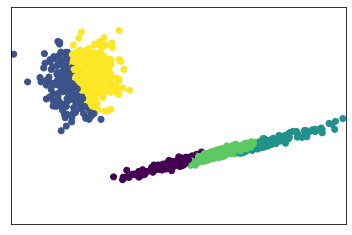

In [117]:
# 3.3 Plot. Note five colors 
ax = plt.subplot(111)
ax.scatter(X[:,0],X[:,1],c = labels)
plt.xlim(-9.0, 5.0)
plt.ylim(-3.0, 6.0)
plt.xticks(())
plt.yticks(())
plt.show() ; 


## BayesianGaussianMixture Dirichlet Process

### DpGMM

In [118]:
# 4.0 Fit a Dirichlet process Gaussian mixture using five components
#  over the same data:
dpgmm = mixture.BayesianGaussianMixture(n_components=5).fit(X)

In [ ]:
# 4.1 Get labels
labels = dpgmm.predict(X)
labels

### Plot

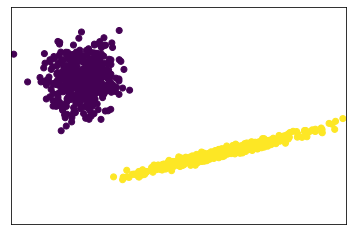

In [121]:
# 4.2 Plot labelled data now:
ax = plt.subplot(111)
ax.scatter(X[:,0],X[:,1],c = labels)
plt.xlim(-9.0, 5.0)
plt.ylim(-3.0, 6.0)
plt.xticks(())
plt.yticks(())
plt.show() ; 

In [ ]:
########## I am done ############